In [1]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
# import scienceplots

# plt.style.use('science')

In [3]:
train_df = pd.read_parquet("C://Ml/alfa/data/train_data.pqt")
test_df = pd.read_parquet("C://Ml/alfa/data/test_data.pqt")

In [4]:
cat_cols = [
    "channel_code", "city", "city_type",
    "okved", "segment", "start_cluster",
    "index_city_code", "ogrn_month", "ogrn_year",
]
train_df[cat_cols] = train_df[cat_cols].astype("category")
test_df[cat_cols] = test_df[cat_cols].astype("category")

<Axes: ylabel='Count_nan'>

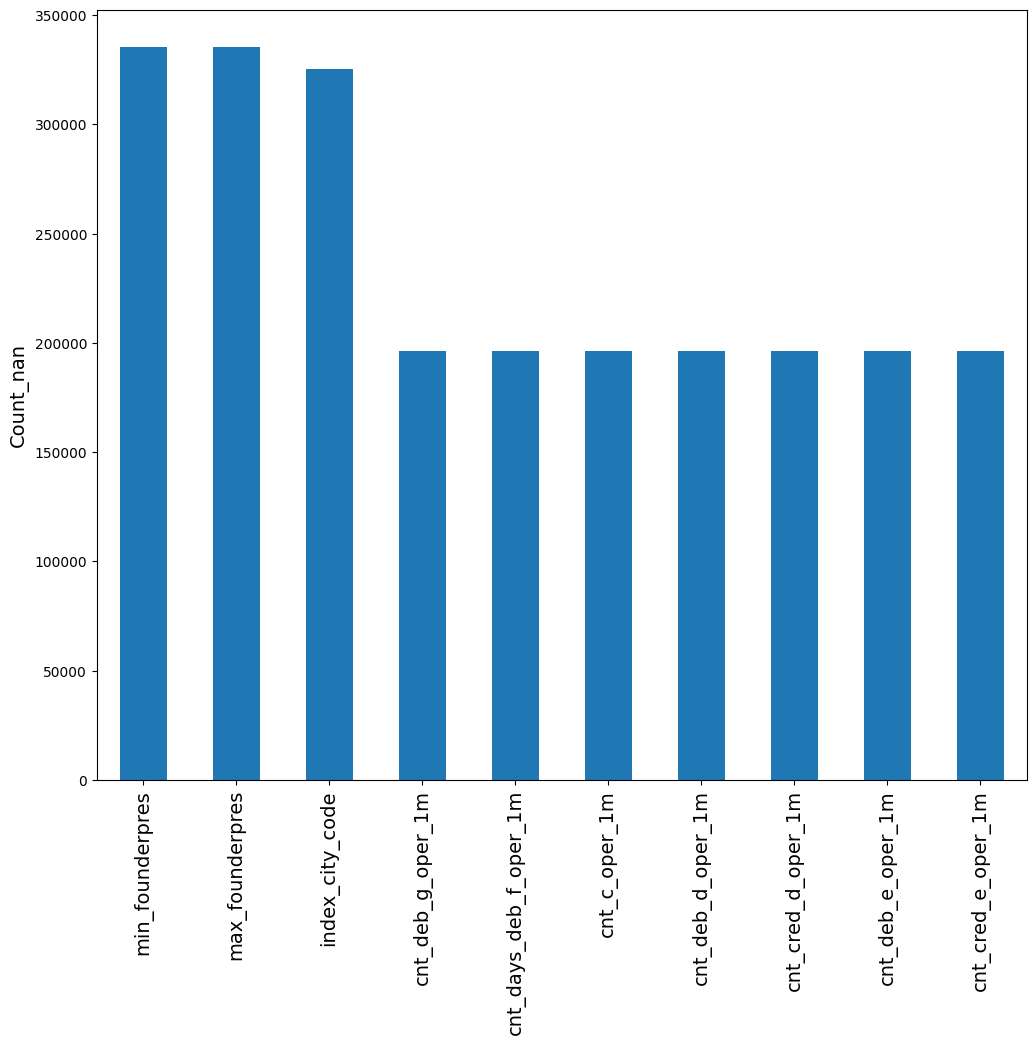

In [5]:
train_df.isna().sum()

plt.figure(figsize=(12,10))
number_nan_in_columns=train_df.isna().sum().sort_values(ascending=[False])
plt.xticks(rotation=90,size=14)
plt.ylabel('Count_nan',size=14)
number_nan_in_columns.head(10).plot(kind='bar')


<Axes: xlabel='end_cluster'>

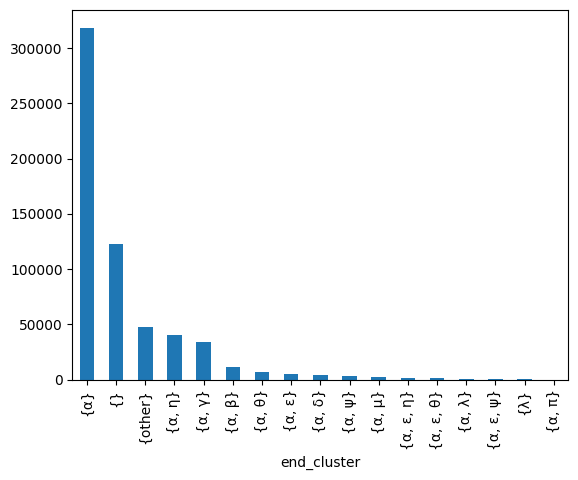

In [17]:

train_df['end_cluster'].value_counts().plot(kind='bar')

c:\Users\Глеб\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


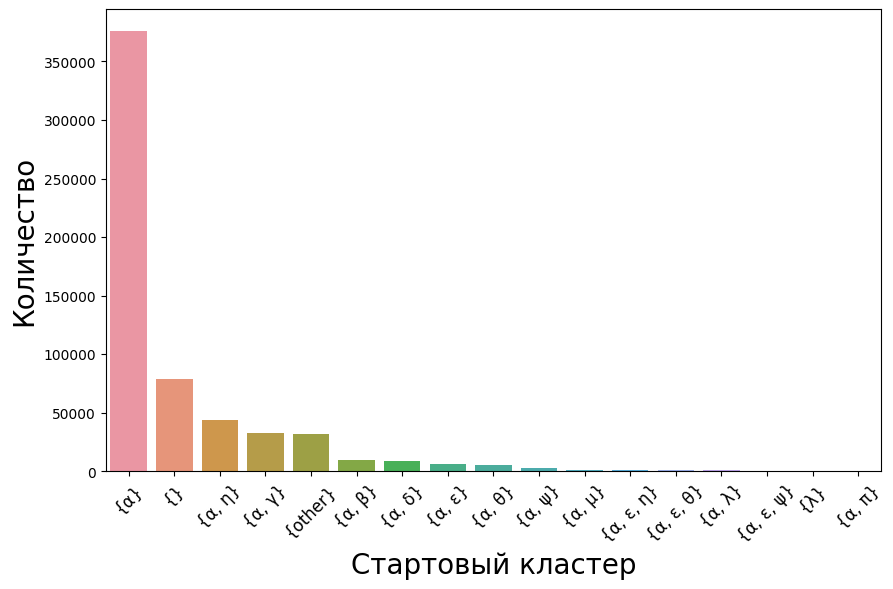

In [33]:
sorted_counts = train_df['start_cluster'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, size=12)
sns.countplot(data=train_df, x='start_cluster', order=sorted_counts.index)
plt.xlabel('Стартовый кластер',size=20)
plt.ylabel('Количество',size=20)
plt.show()


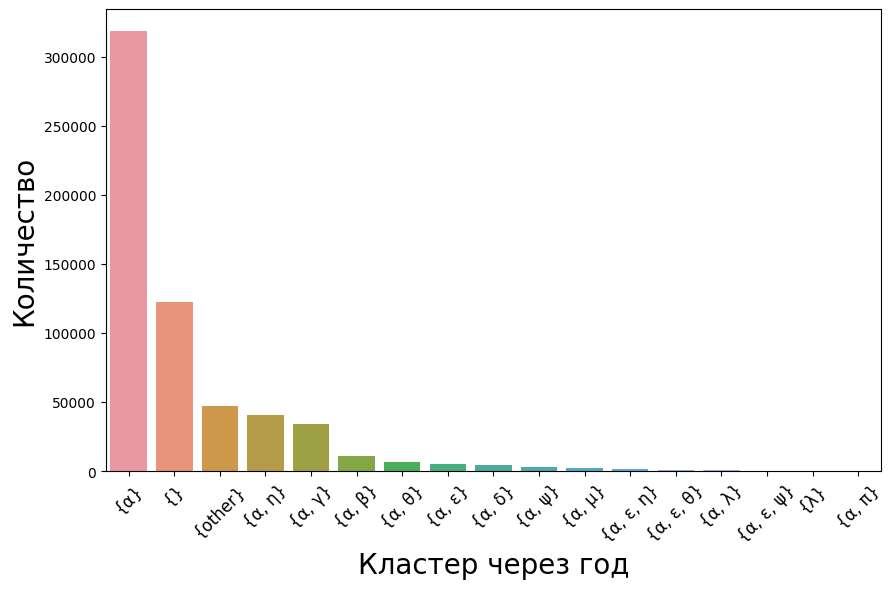

In [34]:
sorted_counts = train_df['end_cluster'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.xticks(rotation=45, size=12)
sns.countplot(data=train_df, x='end_cluster', order=sorted_counts.index)
plt.xlabel('Кластер через год',size=20)
plt.ylabel('Количество',size=20)
plt.show()

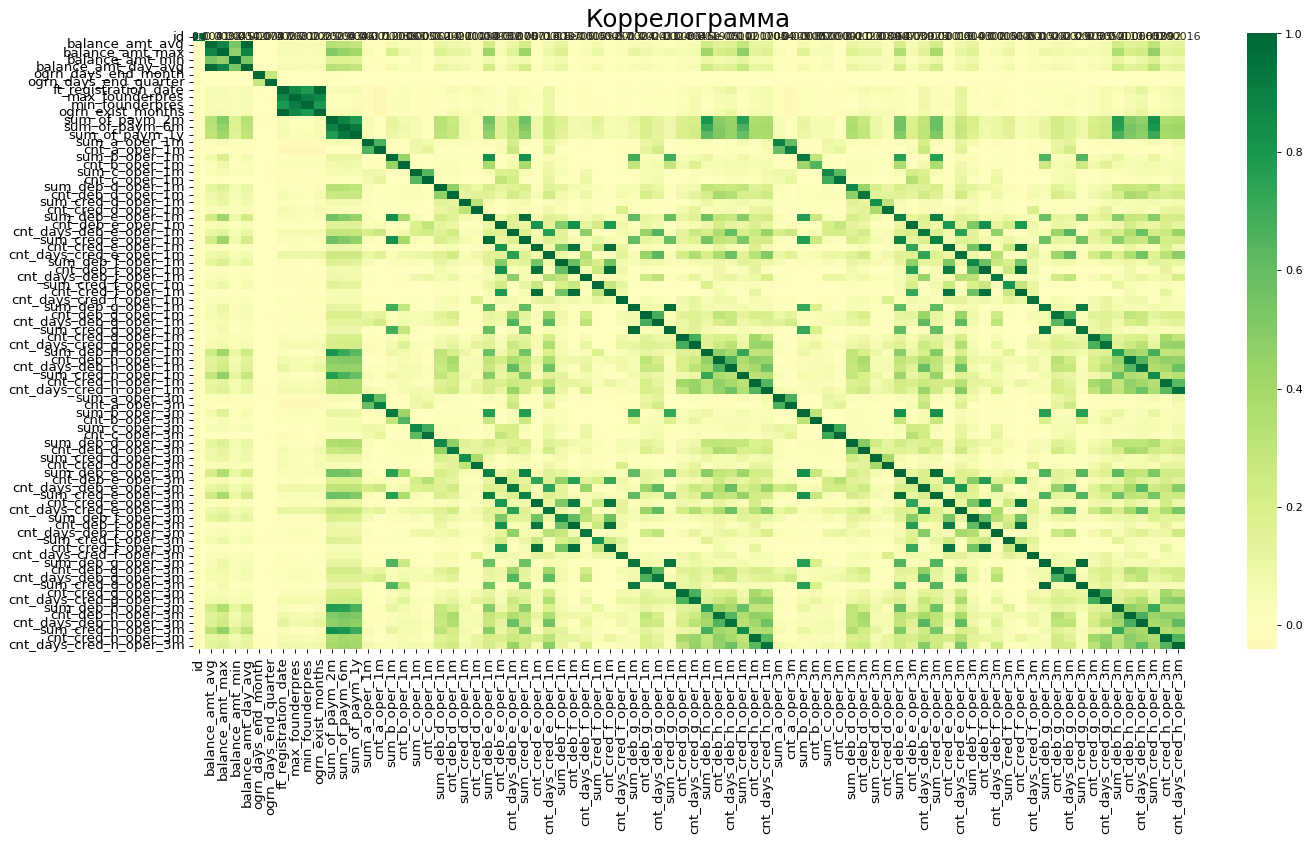

In [39]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_df[numeric_columns].corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(20,10), dpi= 80)
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Коррелограмма', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [40]:
numeric_cols = train_df.drop(columns=cat_cols).select_dtypes(include=np.number).columns
numeric_cols
#Подсчет количества бесконечных значений в числовых столбцах
num_infs = np.isinf(train_df[numeric_cols].values).sum()
num_infs

0